In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [16]:
from google.colab import drive
drive.mount('/content/drive')
IMG_SIZE = 224
BATCH = 32

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
train_data = ImageDataGenerator(rescale = 1./255, validation_split=0.2)
train_generator = train_data.flow_from_directory(
    '/content/drive/MyDrive/Internship /bt 2/brain_tumor_dataset',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH,
    class_mode = 'binary',
    subset = 'training'
)

Found 923 images belonging to 2 classes.


In [21]:
 val_generator = train_data.flow_from_directory(
    '/content/drive/MyDrive/Internship /bt 2/brain_tumor_dataset',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    class_mode='binary',
    subset='validation'
 )

Found 229 images belonging to 2 classes.


In [33]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])



In [36]:
model.fit(train_generator, epochs=5, validation_data=val_generator,
batch_size= BATCH)


Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.5863 - loss: 0.8060 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 619s 21s/step - accuracy: 0.5893 - loss: 0.8001 - val_accuracy: 0.6463 - val_loss: 0.5698
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.8000 - loss: 0.3938 - val_accuracy: 0.7686 - val_loss: 0.4594
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.8624 - loss: 0.3019 - val_accuracy: 0.7817 - val_loss: 0.4206
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.9218 - loss: 0.2322 - val_accuracy: 0.7686 - val_loss: 0.5240
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.9562 - loss: 0.1358 - val_accuracy: 0.8777 - val_loss: 0.2846


In [39]:
model.save('/content/drive/MyDrive/bt2/BrainTumor.h5'),
print("Model Loaded")

Model Loaded


In [45]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

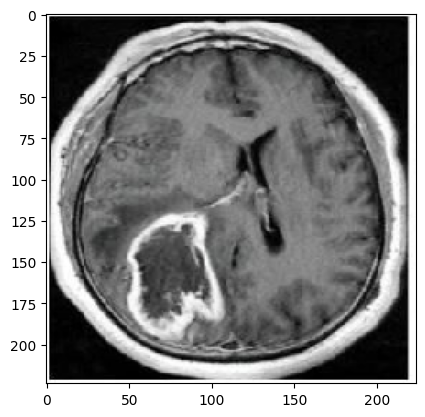

In [62]:
testpath="/content/drive/MyDrive/Internship /bt dataset/yes/Y109.JPG"
img=image.load_img(testpath,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [63]:
 im_arr=image.img_to_array(img)
 im_arr=np.expand_dims(im_arr,axis=0)
 im_arr /= 255.

 fin = model.predict(im_arr)
 print(fin)

if fin >= 0.5:
    print("Brain tumor is present")
else:
    print("Brain tumor is not present")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[[0.9986873]]
Brain tumor is present
